In [18]:
import bs4 as bs
import pickle
import requests
import os
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_tickers():
    resp = requests.get("https://en.wikipedia.org/wiki/NIFTY_50")
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.find_all("tr")[1:]:
        ticker = row.find_all("td")[1].text
        tickers.append(ticker)
        
    pickle.dump(tickers, open('nifty-50.pickle', 'wb'))
    return tickers

# get_tickers()

## Tester for saving and checking if a file exists in my ipynb
>Note that I work in Jupyter Notebook and thus my files are in the current directory of my anaconda

In [9]:
# start = dt.datetime(2015, 1, 1)
# end = dt.datetime(2020, 1, 1)

# df = web.DataReader('AXISBANK.NS', 'yahoo', start, end)
# df.to_csv("sanjiv.csv")

In [10]:
# if os.path.isfile('./sanjiv.csv'):
#     print("hello")
# else:
#     print("bad")

hello


## Creating a new directory to place all the csv files of the Nifty

In [13]:
if not os.path.exists('nifty_csvs'):
    os.makedirs('nifty_csvs')

## Range of dates in which I analyze the nifty

In [14]:
start = dt.datetime(2015, 7, 25)
end = dt.datetime(2020, 7, 25)

In [15]:
def get_yahoo_finance(resave_pickle = False):
    if resave_pickle:
        tickers = get_tickers()
    else:
        tickers = pickle.load(open("nifty-50.pickle", "rb"))
        
    for ticker in tickers:
        if not os.path.exists('./nifty_csvs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv("./nifty_csvs/{}.csv".format(ticker))
        else:
            print('Already contains {}.csv'.format(ticker))

# get_yahoo_finance()

## Steps to note
*    1. The main data frame should have adjusted close since that's the measure we are gonna analyse.
*    2. We need the main_df to have adjusted close values as the ticker name so it is easier to analyse

In [24]:
def compile_data():
    tickers = pickle.load(open("nifty-50.pickle", "rb"))
#     print(tickers)
    main_df = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('./nifty_csvs/{}.csv'.format(ticker))
        df.set_index(['Date'], inplace = True)
        df.rename(columns={'Adj Close' : ticker}, inplace=True)
        df.drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis = 1, inplace=True)
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how="outer")
            
    print(main_df)
    main_df.to_csv("main_csv_tickers_joined.csv")
    
compile_data()

            ADANIPORTS.NS  ASIANPAINT.NS  AXISBANK.NS  BAJAJ-AUTO.NS  \
Date                                                                   
2015-07-27     306.395569     824.889404   544.616882    2201.972656   
2015-07-28     305.907593     807.485657   549.957275    2178.276611   
2015-07-29     307.127533     818.798096   555.787537    2192.187256   
2015-07-30     310.689667     829.143677   554.317688    2217.989502   
2015-07-31     317.179657     853.557312   561.960815    2216.278076   
...                   ...            ...          ...            ...   
2020-07-20     317.299988    1750.050537   434.000000    3002.550049   
2020-07-21     314.700012    1722.724731   446.200012    3004.300049   
2020-07-22     312.000000    1694.250000   478.950012    2985.399902   
2020-07-23     313.899994    1727.800049   460.850006    3032.100098   
2020-07-24     309.399994    1712.050049   445.600006    2985.500000   

            BAJFINANCE.NS  BAJAJFINSV.NS  BHARTIARTL.NS  INFRAT

### From here on you can load the close values of Nifty from the main_csv_tickers_joined.csv file directly

## Creating a heatmap of correlation values

<IPython.core.display.Javascript object>


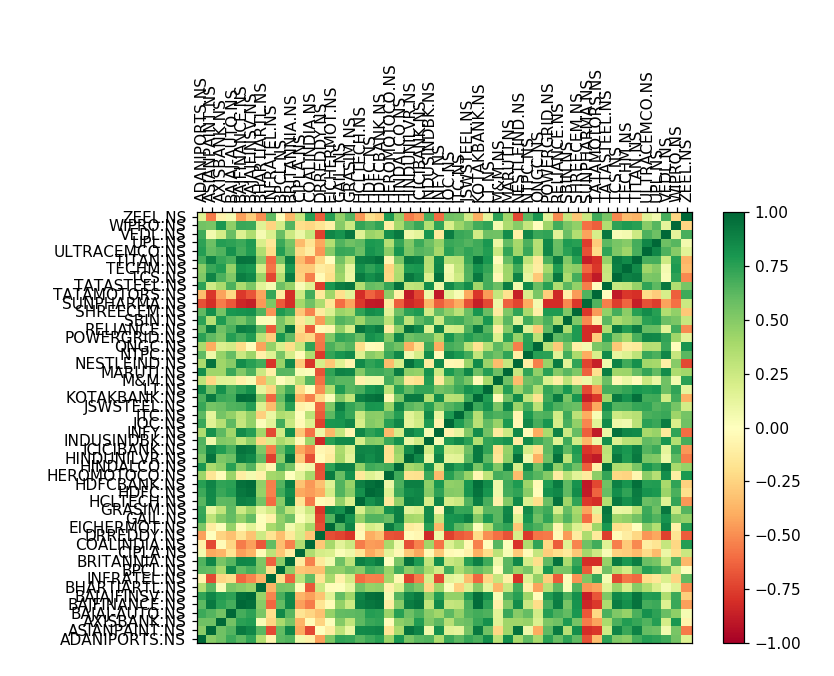

In [24]:
%matplotlib notebook
def visualize_data():
    df = pd.read_csv("main_csv_tickers_joined.csv")
    df_corr = df.corr()
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    #We add ticks to keep track of x and y axes
    ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor = False)
    #to place x axis on top since heatmap is more like a table
    ax.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    
visualize_data()